In [2998]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2999]:
pd.set_option('display.max_rows', None)

In [3000]:
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

##### Plant 2 Generation Data

In [3017]:
# Plant 2 Generation data
df2 = pd.read_csv('Plant_2_Generation_Data.csv', index_col='DATE_TIME', parse_dates=True)

In [3018]:
df2.head()

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,,,
2020-05-15,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
2020-05-15,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2020-05-15,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
2020-05-15,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [3019]:
df2.shape

(67698, 6)

In [3020]:
# the number of inverters
df2['SOURCE_KEY'].nunique()

22

In [3021]:
# aggregate all data from the 22 inverters
df2 = df2.groupby('DATE_TIME')[['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']].agg('sum')

In [3022]:
df2.head(2)

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,
2020-05-15 00:00:00,0.0,0.0,48899.938095,1.418960e+10
2020-05-15 00:15:00,0.0,0.0,28401.000000,1.418960e+10


In [3023]:
# remove other dates outside of this range
df2 = df2[(df2.index >= '2020-05-15') & (df2.index <= '2020-06-18')]

In [3024]:
df2 = df2.reset_index()

In [3025]:
df2.head(2)

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,0.0,0.0,48899.938095,1.418960e+10
1,2020-05-15 00:15:00,0.0,0.0,28401.000000,1.418960e+10


In [3026]:
df2['DATE_TIME'] = pd.to_datetime(df2['DATE_TIME'], errors='coerce')

In [3027]:
df2['TIME'] = df2['DATE_TIME'].dt.time
df2['DATE'] = df2['DATE_TIME'].dt.date

In [3028]:
df2.head(2)

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,TIME,DATE
0,2020-05-15 00:00:00,0.0,0.0,48899.938095,1.418960e+10,00:00:00,2020-05-15
1,2020-05-15 00:15:00,0.0,0.0,28401.000000,1.418960e+10,00:15:00,2020-05-15


In [3029]:
df2.shape

(3259, 7)

In [3030]:
# check missing data
df2.isnull().sum()

DATE_TIME      0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
TIME           0
DATE           0
dtype: int64

In [3031]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    2102 non-null   datetime64[ns]
 1   DC_POWER     2102 non-null   float64       
 2   AC_POWER     2102 non-null   float64       
 3   DAILY_YIELD  2102 non-null   float64       
 4   TOTAL_YIELD  2102 non-null   float64       
 5   TIME         2102 non-null   object        
 6   DATE         2102 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 115.1+ KB


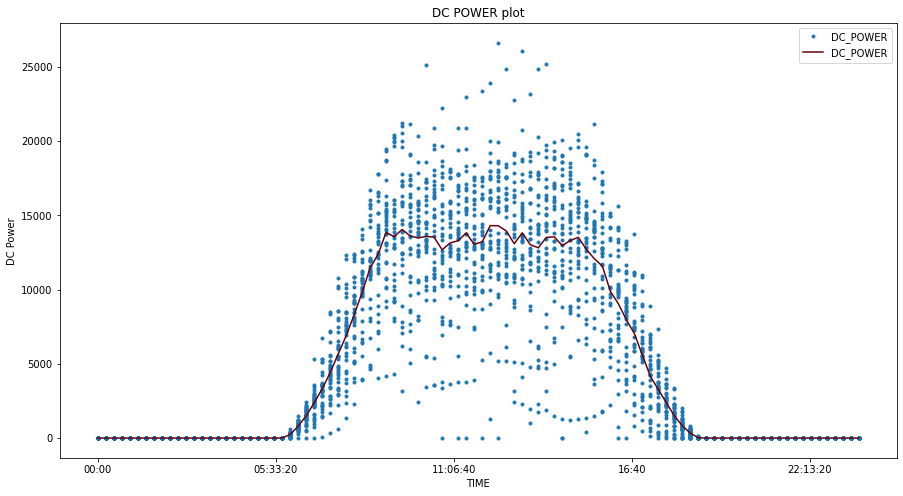

In [3032]:
# view the data across all hours
df2.plot(x= 'TIME', y='DC_POWER', style='.', figsize = (15, 8))
df2.groupby('TIME')['DC_POWER'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('DC Power')
plt.title('DC POWER plot')
plt.show()

##### Plant 2 Weather Data

In [3047]:
df2_2 = pd.read_csv('Plant_2_Weather_Sensor_Data.csv', index_col='DATE_TIME', parse_dates=True)

In [3048]:
df2_2.head(2)

,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DATE_TIME,,,,,
2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0


In [3049]:
df2_2.shape

(3259, 5)

In [3050]:
# remove other dates outside of this range
df2_2 = df2_2[(df2_2.index >= '2020-05-15') & (df2_2.index <= '2020-06-18')]

In [3051]:
df2_2.shape

(3259, 5)

In [3052]:
df2_2 = df2_2.reset_index()

In [3053]:
df2_2.head(2)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0


In [3054]:
df2_2['DATE_TIME'] = pd.to_datetime(df2_2['DATE_TIME'], errors='coerce')

In [3055]:
df2_2['TIME'] = df2_2['DATE_TIME'].dt.time
df2_2['DATE'] = df2_2['DATE_TIME'].dt.date

In [3056]:
df2_2.head(2)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,TIME,DATE
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,00:00:00,2020-05-15
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0,00:15:00,2020-05-15


In [3057]:
df2_2.shape

(3259, 8)

In [3058]:
# check missing data
df2_2.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
TIME                   0
DATE                   0
dtype: int64

In [3059]:
df2_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   PLANT_ID             3259 non-null   int64         
 2   SOURCE_KEY           3259 non-null   object        
 3   AMBIENT_TEMPERATURE  3259 non-null   float64       
 4   MODULE_TEMPERATURE   3259 non-null   float64       
 5   IRRADIATION          3259 non-null   float64       
 6   TIME                 3259 non-null   object        
 7   DATE                 3259 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 203.8+ KB


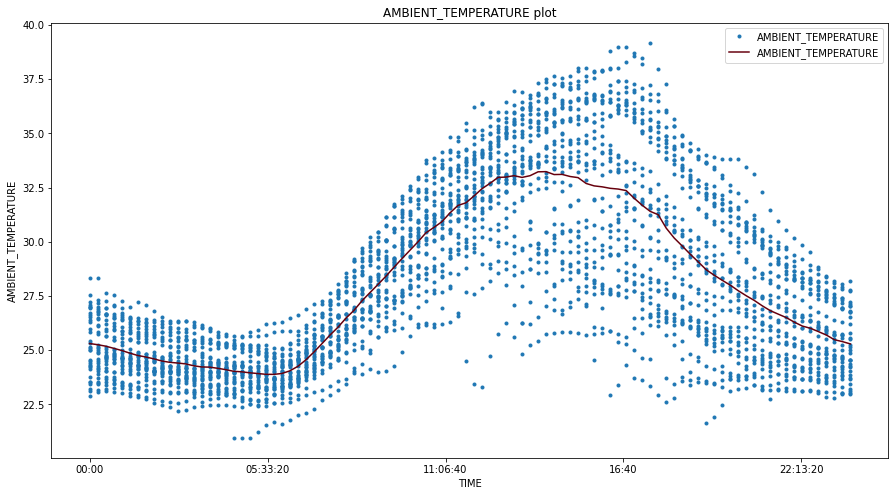

In [3060]:
# view the data across all hours
df2_2.plot(x= 'TIME', y='AMBIENT_TEMPERATURE', style='.', figsize = (15, 8))
df2_2.groupby('TIME')['AMBIENT_TEMPERATURE'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('AMBIENT_TEMPERATURE')
plt.title('AMBIENT_TEMPERATURE plot')
plt.show()

# EDA

In [3061]:
# Plant 2 Generation Data
df2.head(3)

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,TIME,DATE
0,2020-05-15 00:00:00,0.0,0.0,48899.938095,1.418960e+10,00:00:00,2020-05-15
1,2020-05-15 00:15:00,0.0,0.0,28401.000000,1.418960e+10,00:15:00,2020-05-15
2,2020-05-15 00:30:00,0.0,0.0,28401.000000,1.418960e+10,00:30:00,2020-05-15


In [3062]:
# Plant 2 Weather Data
df2_2.head(3)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,TIME,DATE
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,00:00:00,2020-05-15
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0,00:15:00,2020-05-15
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0,00:30:00,2020-05-15


### Check distributions of numeric variables (Generation data)

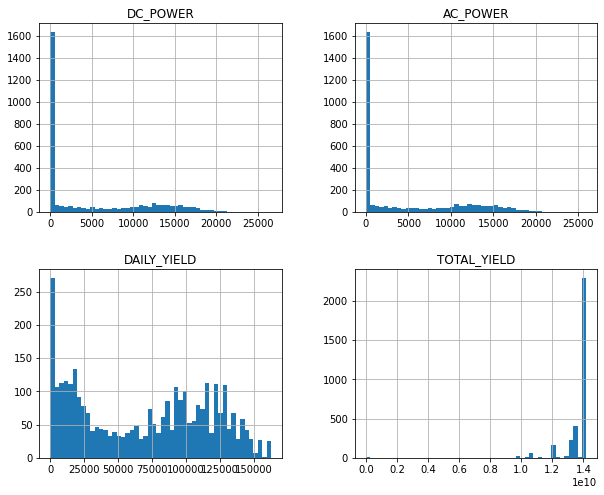

In [3063]:
df2.hist(bins=50, figsize=[10,8])
plt.show();

# the solar panels have long idle hours, which explains the zeros

In [3064]:
# check distribution of numeric variables when plant is active
# disregard the idle hours
df2_active = df2[(df2['DC_POWER'] != 0) | (df2['AC_POWER'] != 0)]

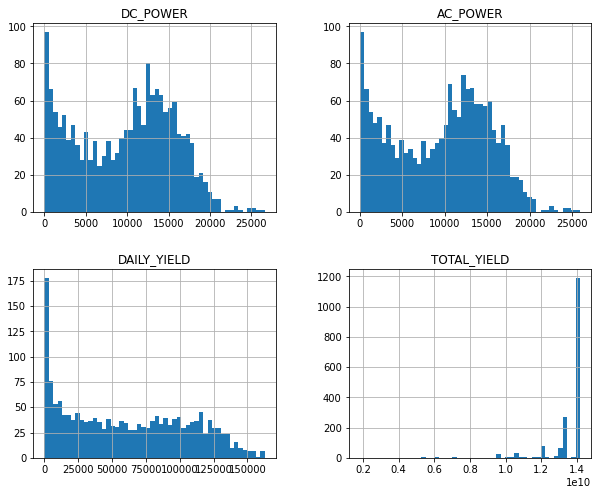

In [3065]:
df2_active.hist(bins=50, figsize=[10,8])
plt.show()

# findings:
# after sunrise, median concentrates at around 12500 for both DC and AC
# DC and AC are highly correlated

### Check correlations between DC and AC

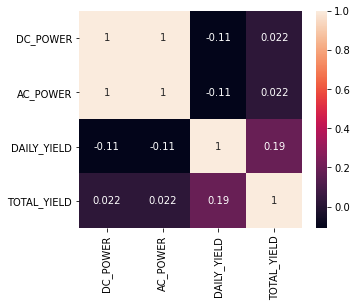

In [3066]:
correlations = df2.corr()
f, ax = plt.subplots(figsize=(5,4))
sns.heatmap(correlations, annot=True)

# DC and AC are perfectly correlated

### Check relationships between DC and DAILY YIELD

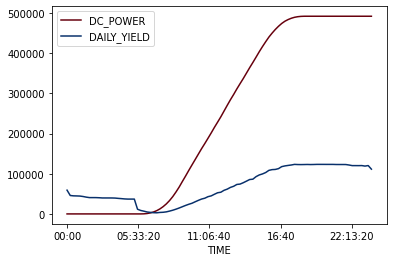

In [3067]:
# plot
ax1 = df2.groupby('TIME')['DC_POWER'].agg('mean').cumsum().plot(legend=True, colormap='Reds_r')
ax.set_ylabel('DC', color='blue')
ax2 = ax.twinx()
ax2 = df2.groupby('TIME')['DAILY_YIELD'].agg('mean').plot(legend=True, colormap='Blues_r')
ax.set_ylabel('DAILY_YIELD', color='red')

plt.show();

# convertion rate is around 20%
# almost simultaneous, plus panels still radiate energy after panels stop

### Check "generation" time series

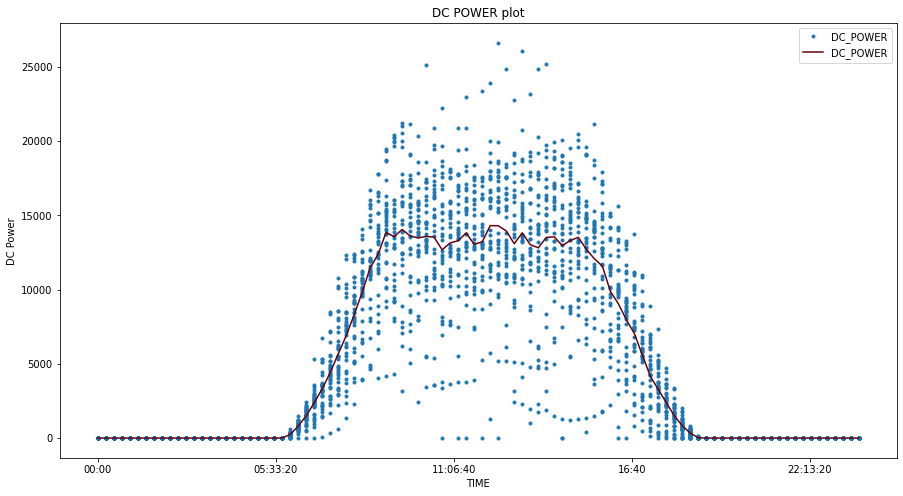

In [3068]:
# mean values on an average day
# view the data across all hours
df2.plot(x= 'TIME', y='DC_POWER', style='.', figsize = (15, 8))
df2.groupby('TIME')['DC_POWER'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('DC Power')
plt.title('DC POWER plot')
plt.show()

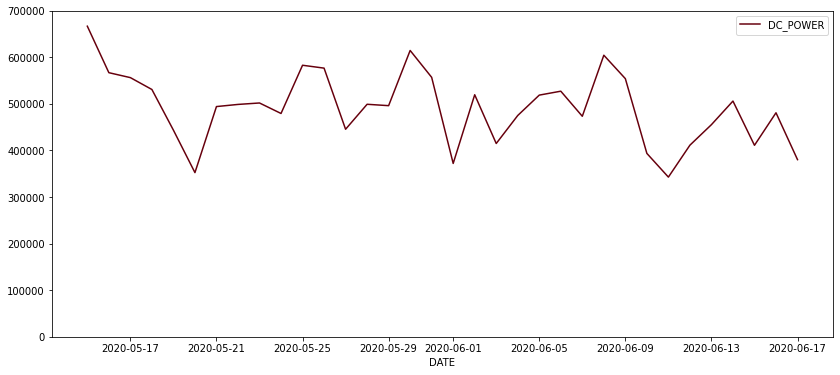

In [3069]:
# mean values over the entire timespan 5-15 to 6-17
# DC POWER
ax = df2.groupby('DATE')['DC_POWER'].agg('sum').plot(legend=True, colormap='Reds_r', figsize=[14,6])
ax.set_ylim(0,700000)

plt.show();

### Check distributions of numeric variables (Weather data)

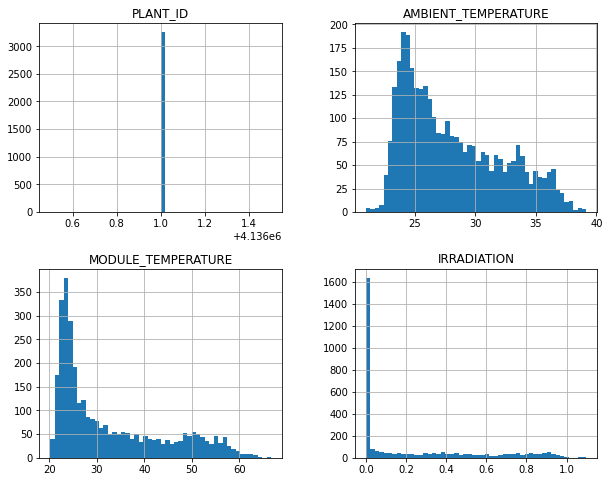

In [3070]:
df2_2.hist(bins=50, figsize=[10,8])
plt.show();

# lots of zeros in IRRADIATION can be explained by idle hours
# however, AMBIENT_TEMPERATURE and MODULE_TEMPERATURE are not exactly the similar shapes

### Check relationships between ambient and module temp

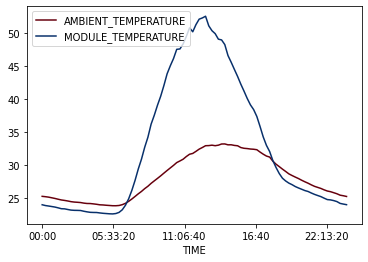

In [3071]:
# plot over an average day
ax1 = df2_2.groupby('TIME')['AMBIENT_TEMPERATURE'].agg('mean').plot(legend=True, colormap='Reds_r')
ax.set_ylabel('AMBIENT', color='blue')
ax2 = ax.twinx()
ax2 = df2_2.groupby('TIME')['MODULE_TEMPERATURE'].agg('mean').plot(legend=True, colormap='Blues_r')
ax.set_ylabel('MODULE', color='red')

plt.show();

# correlated, but module temp tends to be much high when sunrise

### Check relationships between ambient temp and irradiation

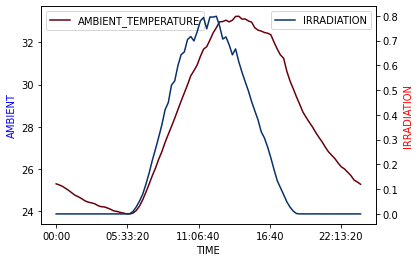

In [3072]:
# plot over an average day
fig, ax = plt.subplots()

ax1 = df2_2.groupby('TIME')['AMBIENT_TEMPERATURE'].agg('mean').plot(legend=True, colormap='Reds_r')
ax.set_ylabel('AMBIENT', color='blue')
ax2 = ax.twinx()
ax2 = df2_2.groupby('TIME')['IRRADIATION'].agg('mean').plot(legend=True, colormap='Blues_r')
ax2.set_ylabel('IRRADIATION', color='red')

plt.show();

# correlated, with certain delay
# irradiation graph explained why the plant still generates power after sun down

### Check weather time series

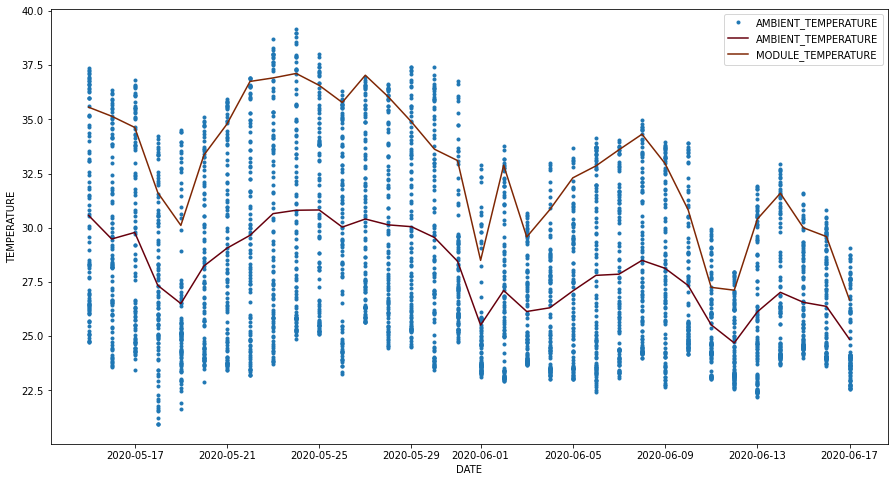

In [3073]:
# mean values over the entire timespan 5-15 to 6-17
# AMBIENT TEMPERATURE

df2_2.plot(x= 'DATE', y='AMBIENT_TEMPERATURE', style='.', figsize = (15, 8))
df2_2.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('mean').plot(legend=True, colormap='Reds_r')
df2_2.groupby('DATE')['MODULE_TEMPERATURE'].agg('mean').plot(legend=True, colormap='Oranges_r')
plt.ylabel('TEMPERATURE')

plt.show();

### Check generation and weather data combined

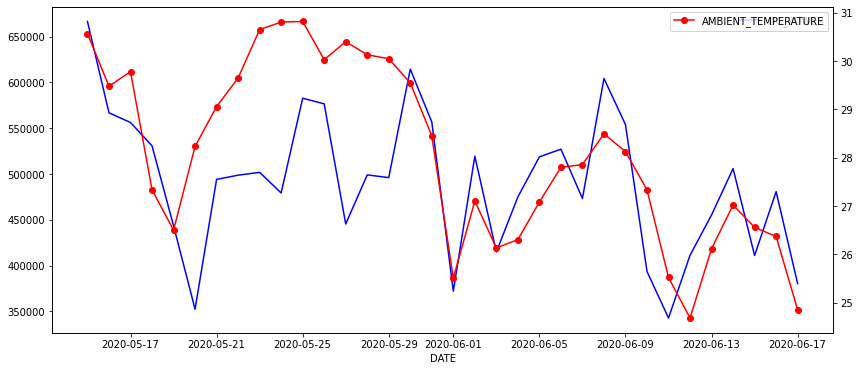

In [3074]:
# over the entire timespan 5-15 to 6-17
# DC & AMBIENT_TEMPERATURE
fig, ax = plt.subplots()

ax1 = df2.groupby('DATE')['DC_POWER'].agg('sum').plot(legend=True, color='blue', figsize=[14,6])
ax2 = ax.twinx()
ax2 = df2_2.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('mean').plot(legend=True, marker='o', color='r')


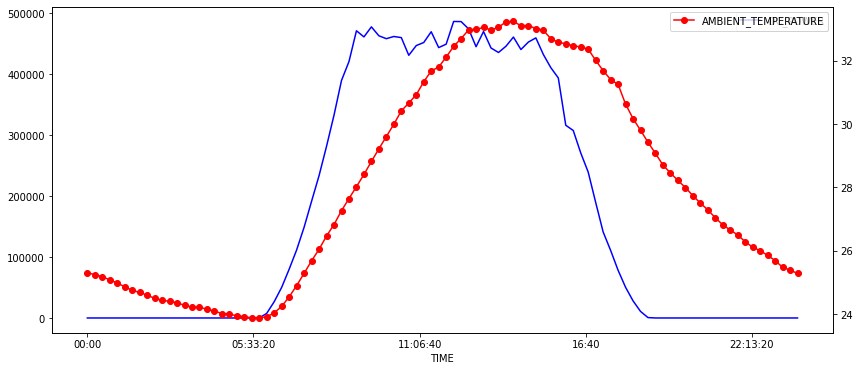

In [3075]:
# over an average day
# DC & AMBIENT_TEMPERATURE
fig, ax = plt.subplots()

ax1 = df2.groupby('TIME')['DC_POWER'].agg('sum').plot(legend=True, color='blue', figsize=[14,6])
ax2 = ax.twinx()
ax2 = df2_2.groupby('TIME')['AMBIENT_TEMPERATURE'].agg('mean').plot(legend=True, marker='o', color='r')


In [3076]:
# apparently, according to both the graphs and common sense, the power
# generated is strongly correlated with the temperature, which is strongly
# correlated with the radiation of the sun
# therefore, apart from the timestamp, we intend to include the "AMBIENT_TEMPERATURE"
# in the model.
# In that case, we'll use the VAR (Vector Autoregressive) Model, and lastly
# compare with the ARIMA model without temperature.

In [3077]:
# Plan:
# Combine the Generation Data and Weather Data:
# We only pick "DC_POWER" from the Generation Data, because other information is derived from it
# and
# "AMBIENT_TEMPERATURE" and "IRRADIATION" from the Weather Data because
# "MODULE_TEMP" is strongly correlated with "AMBIENT_TEMP" and "IRRADIATION"
# doesn't stop after sundown

---

# Model Building

### Combine the variables from the two datasets together

In [3078]:
# basic info from the 2 datasets
df2.head(2)

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,TIME,DATE
0,2020-05-15 00:00:00,0.0,0.0,48899.938095,1.418960e+10,00:00:00,2020-05-15
1,2020-05-15 00:15:00,0.0,0.0,28401.000000,1.418960e+10,00:15:00,2020-05-15


In [3079]:
df2_2.head(2)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,TIME,DATE
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,00:00:00,2020-05-15
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0,00:15:00,2020-05-15


In [3080]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    3259 non-null   datetime64[ns]
 1   DC_POWER     3259 non-null   float64       
 2   AC_POWER     3259 non-null   float64       
 3   DAILY_YIELD  3259 non-null   float64       
 4   TOTAL_YIELD  3259 non-null   float64       
 5   TIME         3259 non-null   object        
 6   DATE         3259 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 178.4+ KB


In [3081]:
df2_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   PLANT_ID             3259 non-null   int64         
 2   SOURCE_KEY           3259 non-null   object        
 3   AMBIENT_TEMPERATURE  3259 non-null   float64       
 4   MODULE_TEMPERATURE   3259 non-null   float64       
 5   IRRADIATION          3259 non-null   float64       
 6   TIME                 3259 non-null   object        
 7   DATE                 3259 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 203.8+ KB


In [3082]:
df2.shape, df2_2.shape

((3259, 7), (3259, 8))

In [3083]:
# save copies of original data
df2.to_csv('df2.csv')
df2_2.to_csv('df2_2.csv')

In [3084]:
# read in data and as the same frequency
generation = pd.read_csv('df2.csv', index_col='DATE_TIME', parse_dates=True)

In [3085]:
weather = pd.read_csv('df2_2.csv', index_col='DATE_TIME', parse_dates=True)

In [3086]:
generation.head(2)

,Unnamed: 0,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,TIME,DATE
DATE_TIME,,,,,,,
2020-05-15 00:00:00,0,0.0,0.0,48899.938095,1.418960e+10,00:00:00,2020-05-15
2020-05-15 00:15:00,1,0.0,0.0,28401.000000,1.418960e+10,00:15:00,2020-05-15


In [3087]:
weather.head(2)

,Unnamed: 0,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,TIME,DATE
DATE_TIME,,,,,,,,
2020-05-15 00:00:00,0,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,00:00:00,2020-05-15
2020-05-15 00:15:00,1,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0,00:15:00,2020-05-15


In [3088]:
# merge 2 dataframes
df = pd.merge(generation, weather, left_index=True, right_index=True)

In [3089]:
df.head(2)

,Unnamed: 0_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,TIME_x,DATE_x,Unnamed: 0_y,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,TIME_y,DATE_y
DATE_TIME,,,,,,,,,,,,,,,
2020-05-15 00:00:00,0,0.0,0.0,48899.938095,1.418960e+10,00:00:00,2020-05-15,0,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,00:00:00,2020-05-15
2020-05-15 00:15:00,1,0.0,0.0,28401.000000,1.418960e+10,00:15:00,2020-05-15,1,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0,00:15:00,2020-05-15


In [3090]:
df.shape

(3259, 15)

In [3091]:
# only keep variables needed
two_variables = ['DC_POWER', 'AMBIENT_TEMPERATURE']
df = df[two_variables]

In [3092]:
df.head(2)

,DC_POWER,AMBIENT_TEMPERATURE
DATE_TIME,,
2020-05-15 00:00:00,0.0,27.004764
2020-05-15 00:15:00,0.0,26.880811


In [3093]:
# save a copy of combined dataset
df.to_csv('df_combined.csv')

### Plot the source data

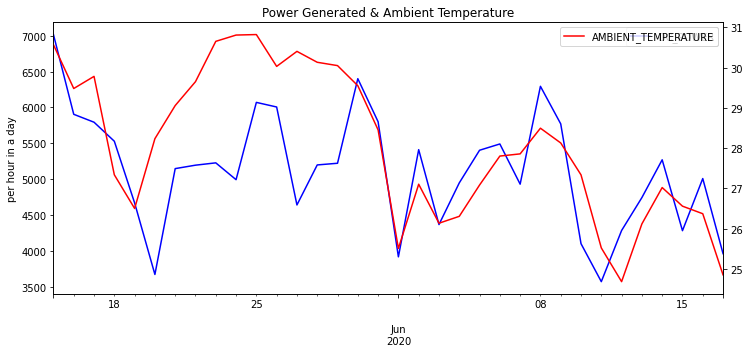

In [3094]:
# freq = daily
fig, ax = plt.subplots()

title = 'Power Generated & Ambient Temperature'
ylabel='per hour in a day'
xlabel=''

ax = df['DC_POWER'].resample(rule='D').mean().plot(figsize=(12,5),title=title,legend=True, color='blue')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax2 = ax.twinx()
ax2 = df['AMBIENT_TEMPERATURE'].resample(rule='D').mean().plot(legend=True, color='red');

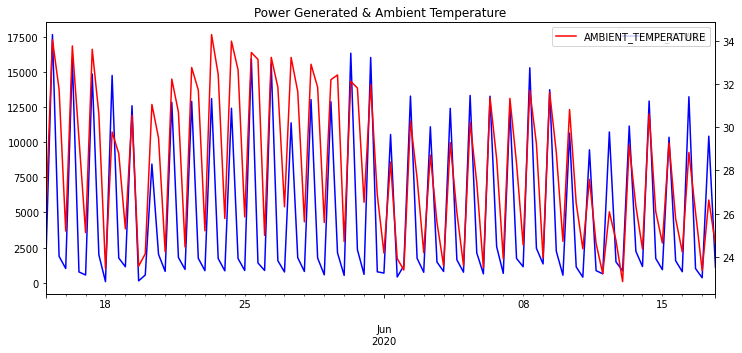

In [3095]:
# freq = 8H
fig, ax = plt.subplots()

title = 'Power Generated & Ambient Temperature'
ylabel=''
xlabel=''

ax = df['DC_POWER'].resample(rule='8H').mean().plot(figsize=(12,5),title=title,legend=True, color='blue')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax2 = ax.twinx()
ax2 = df['AMBIENT_TEMPERATURE'].resample(rule='8H').mean().plot(legend=True, color='red');

In [3096]:
# For prediction purpose, we need to downsample, but we need to find a
# suitable frequency
# Higher frequency leads to overfitting
# Lower frequency lead to inaccuracy

### (frequency = 8H)

### Downsampling

In [3097]:
# first try resampling the data from minute to 8H frequency
df = pd.read_csv('df_combined.csv', index_col='DATE_TIME', parse_dates=True)
df.head(2)

,DC_POWER,AMBIENT_TEMPERATURE
DATE_TIME,,
2020-05-15 00:00:00,0.0,27.004764
2020-05-15 00:15:00,0.0,26.880811


In [3098]:
df['DC_POWER'] = df['DC_POWER'].resample(rule='8H').sum()
df['AMBIENT_TEMPERATURE'] = df['AMBIENT_TEMPERATURE'].resample(rule='8H').mean()

In [3099]:
df = df.dropna()

In [3100]:
df.head(2)

,DC_POWER,AMBIENT_TEMPERATURE
DATE_TIME,,
2020-05-15 00:00:00,42928.732857,25.918321
2020-05-15 08:00:00,565512.066667,34.060594


In [3101]:
df.tail(2)

,DC_POWER,AMBIENT_TEMPERATURE
DATE_TIME,,
2020-06-17 08:00:00,333832.818571,26.626893
2020-06-17 16:00:00,35176.388571,24.575422


In [3102]:
df.shape

(100, 2)

### Test for stationarity, perform any necessary transformations

##### (Test)

In [3103]:
from statsmodels.tsa.stattools import adfuller

In [3104]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [3105]:
adf_test(df['DC_POWER'],title='DC_POWER')

Augmented Dickey-Fuller Test: DC_POWER
ADF test statistic     -1.698670e+01
p-value                 8.930518e-30
# lags used             0.000000e+00
# observations          9.900000e+01
critical value (1%)    -3.498198e+00
critical value (5%)    -2.891208e+00
critical value (10%)   -2.582596e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [3106]:
adf_test(df['AMBIENT_TEMPERATURE'],title='AMBIENT_TEMPERATURE')

Augmented Dickey-Fuller Test: AMBIENT_TEMPERATURE
ADF test statistic      -1.544450
p-value                  0.511419
# lags used              2.000000
# observations          97.000000
critical value (1%)     -3.499637
critical value (5%)     -2.891831
critical value (10%)    -2.582928
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [3107]:
# "AMBIENT_TEMPERATURE" is non-stationary

##### (Transform - Differencing)

In [3108]:
# take a first order difference of the entire df and re-run the DF test
df_transformed = df.diff()

##### (Test again)

In [3109]:
df_transformed = df_transformed.dropna()
adf_test(df_transformed['DC_POWER'], title='DC_POWER')
print()
adf_test(df_transformed['AMBIENT_TEMPERATURE'], title='AMBIENT_TEMPERATURE')

Augmented Dickey-Fuller Test: DC_POWER
ADF test statistic      -5.528054
p-value                  0.000002
# lags used              9.000000
# observations          89.000000
critical value (1%)     -3.506057
critical value (5%)     -2.894607
critical value (10%)    -2.584410
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: AMBIENT_TEMPERATURE
ADF test statistic     -39.337886
p-value                  0.000000
# lags used              1.000000
# observations          97.000000
critical value (1%)     -3.499637
critical value (5%)     -2.891831
critical value (10%)    -2.582928
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [3110]:
# after first order differencing, both variables are stationary now

In [3111]:
df_transformed.head(2)

,DC_POWER,AMBIENT_TEMPERATURE
DATE_TIME,,
2020-05-15 08:00:00,522583.333810,8.142272
2020-05-15 16:00:00,-507345.235238,-2.304335


In [3112]:
df_transformed.shape

(99, 2)

### Train Test Split

In [3113]:
# load forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse
from pmdarima import auto_arima

In [3114]:
# to predict the next day
# save 3 data points for testing
nobs=3
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [3115]:
print(train.shape)
print(test.shape)

(96, 2)
(3, 2)


### VAR

##### (Model order selection)

In [3116]:
# we'll fit a series of  models using the first seven p-values, and base
# our final selection on the model that provides the lowest AIC and BIC scores
for i in [1,2,3,4,5,6,7,8,9,10]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  24.592596618598915
BIC:  24.753894106489476

Order = 2
AIC:  23.240208596076727
BIC:  23.5107718707863

Order = 3
AIC:  23.031605156106014
BIC:  23.41285669270973

Order = 4
AIC:  23.022963614766496
BIC:  23.51635703201522

Order = 5
AIC:  23.088231057574625
BIC:  23.695252037172107

Order = 6
AIC:  23.10435378289471
BIC:  23.826521020990118

Order = 7
AIC:  23.212268679908885
BIC:  24.051134871953426

Order = 8
AIC:  23.228193749008025
BIC:  24.18534660914733

Order = 9
AIC:  23.223663570995853
BIC:  24.30072688718981

Order = 10
AIC:  23.13110406530081
BIC:  24.329738791378105



In [3117]:
model = VAR(train)
for i in [1,2,3,4,5,6,7,8,9,10]:
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  24.592596618598915
BIC:  24.753894106489476

Order = 2
AIC:  23.240208596076727
BIC:  23.5107718707863

Order = 3
AIC:  23.031605156106014
BIC:  23.41285669270973

Order = 4
AIC:  23.022963614766496
BIC:  23.51635703201522

Order = 5
AIC:  23.088231057574625
BIC:  23.695252037172107

Order = 6
AIC:  23.10435378289471
BIC:  23.826521020990118

Order = 7
AIC:  23.212268679908885
BIC:  24.051134871953426

Order = 8
AIC:  23.228193749008025
BIC:  24.18534660914733

Order = 9
AIC:  23.223663570995853
BIC:  24.30072688718981

Order = 10
AIC:  23.13110406530081
BIC:  24.329738791378105



In [3118]:
# The VAR(4) model returns the lowest combined scores

##### (Fit a VAR(4) model)

In [3119]:
results = model.fit(4)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 06, Oct, 2020
Time:                     14:22:10
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    23.5164
Nobs:                     92.0000    HQIC:                   23.2221
Log likelihood:          -1302.14    FPE:                9.98369e+09
AIC:                      23.0230    Det(Omega_mle):     8.28370e+09
--------------------------------------------------------------------
Results for equation DC_POWER
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                      -2738.555523      7114.033564           -0.385           0.700
L1.DC_POWER                   -0.804673         0.143240           -5.618           0.000
L1.AMBIENT_TEMPERATUR

##### (Predict the next 3 values)

In [3120]:
lag_order = results.k_ar
lag_order

4

In [3121]:
z = results.forecast(y=train.values[-lag_order:], steps=3)
z

array([[-1.80002326e+04, -2.46539158e+00],
       [ 4.04273959e+05,  5.67349880e+00],
       [-4.09390567e+05, -3.89555374e+00]])

In [3122]:
test

,DC_POWER,AMBIENT_TEMPERATURE
DATE_TIME,,
2020-06-17 00:00:00,-20900.492381,-2.703339
2020-06-17 08:00:00,322630.785238,3.272685
2020-06-17 16:00:00,-298656.430000,-2.051472


In [3123]:
idx = pd.date_range('6/17/2020', periods=3, freq = '8H')
df_forecast_var = pd.DataFrame(z, index=idx, columns=['DC_POWER_1d','TEMPERATURE_1d'])
df_forecast_var

,DC_POWER_1d,TEMPERATURE_1d
2020-06-17 00:00:00,-18000.232556,-2.465392
2020-06-17 08:00:00,404273.959419,5.673499
2020-06-17 16:00:00,-409390.566800,-3.895554


##### (Invert the transformation)

In [3124]:
# build the forecast values from the first difference set
df_forecast_var['DC_POWER_Forecast'] = df['DC_POWER'].iloc[-nobs-1] + df_forecast_var['DC_POWER_1d'].cumsum()

df_forecast_var['TEMPERATURE_Forecast'] = df['AMBIENT_TEMPERATURE'].iloc[-nobs-1] + df_forecast_var['TEMPERATURE_1d'].cumsum()

In [3125]:
df_forecast_var

,DC_POWER_1d,TEMPERATURE_1d,DC_POWER_Forecast,TEMPERATURE_Forecast
2020-06-17 00:00:00,-18000.232556,-2.465392,14102.293159,23.592156
2020-06-17 08:00:00,404273.959419,5.673499,418376.252578,29.265655
2020-06-17 16:00:00,-409390.566800,-3.895554,8985.685778,25.370101


##### (Plot predicted values against test set)

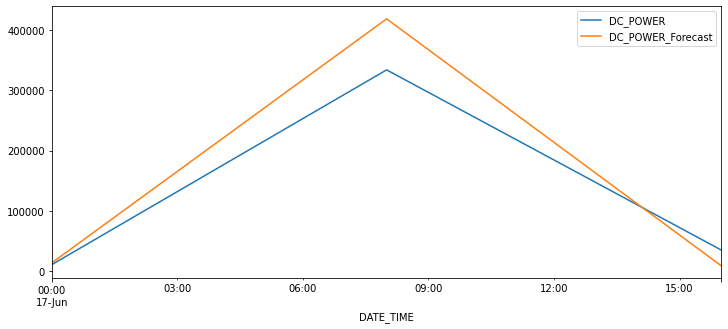

In [3126]:
df['DC_POWER'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast_var['DC_POWER_Forecast'].plot(legend=True);

##### (Evaluate the model)

In [3127]:
RMSE1 = rmse(df['DC_POWER'][-nobs:], df_forecast_var['DC_POWER_Forecast'])
print(f'DC_POWER VAR(4) RMSE: {RMSE1:.3f}')

DC_POWER VAR(4) RMSE: 51127.151


---

### (frequency = 3H)

In [3128]:
df = pd.read_csv('df_combined.csv', index_col='DATE_TIME', parse_dates=True)
df.head(2)

,DC_POWER,AMBIENT_TEMPERATURE
DATE_TIME,,
2020-05-15 00:00:00,0.0,27.004764
2020-05-15 00:15:00,0.0,26.880811


In [3129]:
# for prediction purpose, resamplet the dataset from minute to 3H frequency
df['DC_POWER'] = df['DC_POWER'].resample(rule='3H').sum()
df['AMBIENT_TEMPERATURE'] = df['AMBIENT_TEMPERATURE'].resample(rule='3H').mean()

In [3130]:
df = df.dropna()

In [3131]:
df.head(2)

,DC_POWER,AMBIENT_TEMPERATURE
DATE_TIME,,
2020-05-15 00:00:00,0.0,26.523176
2020-05-15 03:00:00,0.0,25.539363


In [3132]:
df.tail(2)

,DC_POWER,AMBIENT_TEMPERATURE
DATE_TIME,,
2020-06-17 18:00:00,2528.992381,24.024615
2020-06-17 21:00:00,0.000000,23.603429


In [3133]:
df.shape

(272, 2)

### Test for stationarity, perform any necessary transformations

##### (Test)

In [3134]:
adf_test(df['DC_POWER'],title='DC_POWER')

Augmented Dickey-Fuller Test: DC_POWER
ADF test statistic     -8.152807e+00
p-value                 9.594631e-13
# lags used             0.000000e+00
# observations          2.710000e+02
critical value (1%)    -3.454713e+00
critical value (5%)    -2.872265e+00
critical value (10%)   -2.572485e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [3135]:
adf_test(df['AMBIENT_TEMPERATURE'],title='AMBIENT_TEMPERATURE')

Augmented Dickey-Fuller Test: AMBIENT_TEMPERATURE
ADF test statistic       -1.747798
p-value                   0.406669
# lags used               8.000000
# observations          263.000000
critical value (1%)      -3.455461
critical value (5%)      -2.872593
critical value (10%)     -2.572660
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [3136]:
# "AMBIENT_TEMPERATURE" is non-stationary

##### (Transform - Differencing)

In [3137]:
# take a first order difference of the entire df and re-run the DF test
df_transformed = df.diff()

##### (Test again)

In [3138]:
df_transformed = df_transformed.dropna()
adf_test(df_transformed['DC_POWER'], title='DC_POWER')
print()
adf_test(df_transformed['AMBIENT_TEMPERATURE'], title='AMBIENT_TEMPERATURE')

Augmented Dickey-Fuller Test: DC_POWER
ADF test statistic     -6.819647e+00
p-value                 2.017201e-09
# lags used             1.400000e+01
# observations          2.560000e+02
critical value (1%)    -3.456155e+00
critical value (5%)    -2.872897e+00
critical value (10%)   -2.572822e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: AMBIENT_TEMPERATURE
ADF test statistic     -8.417285e+00
p-value                 2.027591e-13
# lags used             7.000000e+00
# observations          2.630000e+02
critical value (1%)    -3.455461e+00
critical value (5%)    -2.872593e+00
critical value (10%)   -2.572660e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [3139]:
# after first order differencing, both variables are stationary now

In [3140]:
df_transformed.head(2)

,DC_POWER,AMBIENT_TEMPERATURE
DATE_TIME,,
2020-05-15 03:00:00,0.00,-0.983813
2020-05-15 06:00:00,103209.72,0.970096


In [3141]:
df_transformed.shape

(271, 2)

### Train Test Split

In [3142]:
# save 8 data points for testing
nobs=8
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [3143]:
print(train.shape)
print(test.shape)

(263, 2)
(8, 2)


### VAR

##### (Model order selection)

In [3144]:
# we'll fit a series of  models using the first seven p-values, and base
# our final selection on the model that provides the lowest AIC and BIC scores
for i in [1,2,3,4,5,6,7,8,9,10]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  22.03374021299979
BIC:  22.11545802606302

Order = 2
AIC:  21.89699702054201
BIC:  22.033568683657823

Order = 3
AIC:  21.653982804976064
BIC:  21.8457118158769

Order = 4
AIC:  21.40245724410285
BIC:  21.64964992792753

Order = 5
AIC:  21.075967548631446
BIC:  21.378933094632515

Order = 6
AIC:  20.497637924569016
BIC:  20.85668842343001

Order = 7
AIC:  20.100804794277764
BIC:  20.51625527605271

Order = 8
AIC:  20.133042970984327
BIC:  20.60521144367212

Order = 9
AIC:  20.158469658317703
BIC:  20.687677147084255

Order = 10
AIC:  20.18735182384145
BIC:  20.773922410902934



In [3145]:
model = VAR(train)
for i in [1,2,3,4,5,6,7,8,9,10]:
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  22.03374021299979
BIC:  22.11545802606302

Order = 2
AIC:  21.89699702054201
BIC:  22.033568683657823

Order = 3
AIC:  21.653982804976064
BIC:  21.8457118158769

Order = 4
AIC:  21.40245724410285
BIC:  21.64964992792753

Order = 5
AIC:  21.075967548631446
BIC:  21.378933094632515

Order = 6
AIC:  20.497637924569016
BIC:  20.85668842343001

Order = 7
AIC:  20.100804794277764
BIC:  20.51625527605271

Order = 8
AIC:  20.133042970984327
BIC:  20.60521144367212

Order = 9
AIC:  20.158469658317703
BIC:  20.687677147084255

Order = 10
AIC:  20.18735182384145
BIC:  20.773922410902934



In [3146]:
# The VAR(7) model returns the lowest combined scores

##### (Fit the VAR(7) model)

In [3147]:
results = model.fit(7)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 06, Oct, 2020
Time:                     14:22:20
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    20.5163
Nobs:                     256.000    HQIC:                   20.2679
Log likelihood:          -3269.40    FPE:                5.36766e+08
AIC:                      20.1008    Det(Omega_mle):     4.78990e+08
--------------------------------------------------------------------
Results for equation DC_POWER
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                       -491.811594      1451.394887           -0.339           0.735
L1.DC_POWER                   -0.685313         0.065684          -10.433           0.000
L1.AMBIENT_TEMPERATUR

##### (Predict the next 8 values)

In [3148]:
lag_order = results.k_ar
lag_order

7

In [3149]:
z = results.forecast(y=train.values[-lag_order:], steps=8)
z

array([[ 2.13929826e+03, -8.17496303e-01],
       [ 4.50130312e+03,  4.96611166e-02],
       [ 5.98121647e+04,  1.58509207e+00],
       [ 9.05903966e+04,  3.37437003e+00],
       [-3.77209127e+03,  2.08300410e+00],
       [-7.95689990e+04, -1.35156506e+00],
       [-6.45871552e+04, -2.97851617e+00],
       [-7.07581801e+03, -2.06166748e+00]])

In [3150]:
test

,DC_POWER,AMBIENT_TEMPERATURE
DATE_TIME,,
2020-06-17 00:00:00,0.000000,-0.064054
2020-06-17 03:00:00,0.000000,-1.203490
2020-06-17 06:00:00,29863.871905,0.436218
2020-06-17 09:00:00,91561.493333,2.365983
2020-06-17 12:00:00,31701.686667,2.490223
2020-06-17 15:00:00,-79861.092857,-1.051793
2020-06-17 18:00:00,-70736.966667,-3.085081
2020-06-17 21:00:00,-2528.992381,-0.421186


In [3151]:
idx = pd.date_range('6/17/2020', periods=8, freq = '3H')
df_forecast_var = pd.DataFrame(z, index=idx, columns=['DC_POWER_1d','TEMPERATURE_1d'])
df_forecast_var

,DC_POWER_1d,TEMPERATURE_1d
2020-06-17 00:00:00,2139.298256,-0.817496
2020-06-17 03:00:00,4501.303124,0.049661
2020-06-17 06:00:00,59812.164722,1.585092
2020-06-17 09:00:00,90590.396612,3.374370
2020-06-17 12:00:00,-3772.091265,2.083004
2020-06-17 15:00:00,-79568.998987,-1.351565
2020-06-17 18:00:00,-64587.155218,-2.978516
2020-06-17 21:00:00,-7075.818012,-2.061667


##### (Invert the transformation)

In [3152]:
# build the forecast values from the first difference set
df_forecast_var['DC_POWER_Forecast'] = df['DC_POWER'].iloc[-nobs-1] + df_forecast_var['DC_POWER_1d'].cumsum()

df_forecast_var['TEMPERATURE_Forecast'] = df['AMBIENT_TEMPERATURE'].iloc[-nobs-1] + df_forecast_var['TEMPERATURE_1d'].cumsum()

In [3153]:
df_forecast_var

,DC_POWER_1d,TEMPERATURE_1d,DC_POWER_Forecast,TEMPERATURE_Forecast
2020-06-17 00:00:00,2139.298256,-0.817496,2139.298256,23.319113
2020-06-17 03:00:00,4501.303124,0.049661,6640.601379,23.368774
2020-06-17 06:00:00,59812.164722,1.585092,66452.766102,24.953866
2020-06-17 09:00:00,90590.396612,3.374370,157043.162714,28.328236
2020-06-17 12:00:00,-3772.091265,2.083004,153271.071448,30.411240
2020-06-17 15:00:00,-79568.998987,-1.351565,73702.072461,29.059675
2020-06-17 18:00:00,-64587.155218,-2.978516,9114.917243,26.081159
2020-06-17 21:00:00,-7075.818012,-2.061667,2039.099231,24.019491


##### (plot predicted values against test set)

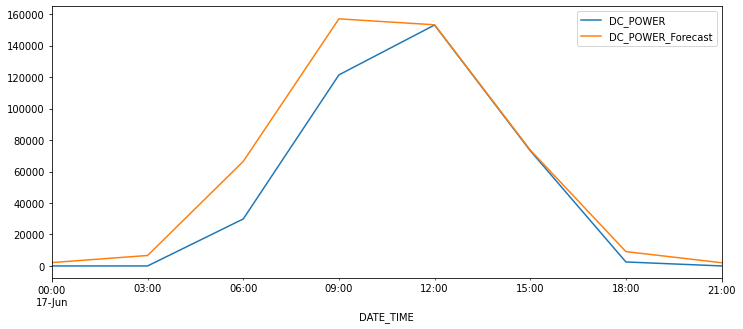

In [3154]:
df['DC_POWER'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast_var['DC_POWER_Forecast'].plot(legend=True);

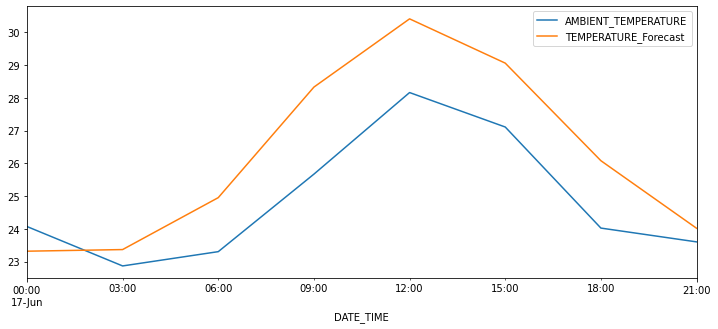

In [3155]:
df['AMBIENT_TEMPERATURE'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast_var['TEMPERATURE_Forecast'].plot(legend=True);

##### (Evaluate the model)

In [3156]:
RMSE2 = rmse(df['DC_POWER'][-nobs:], df_forecast_var['DC_POWER_Forecast'])
print(f'DC_POWER VAR(7) RMSE: {RMSE2:.3f}')

# Significant improvement over model when freq = 8H

DC_POWER VAR(7) RMSE: 18384.070


---

### Compare these results to individual AR(7) models

In [3157]:
from statsmodels.tsa.ar_model import AR,ARResults

In [3159]:
modelM = AR(train['DC_POWER'])
AR7fit1 = modelM.fit(maxlag=7,method='mle')
print(f'Lag: {AR7fit1.k_ar}')
print(f'Coefficients:\n{AR7fit1.params}')

Lag: 7
Coefficients:
const         -581.660960
L1.DC_POWER     -0.683253
L2.DC_POWER     -0.828415
L3.DC_POWER     -0.801694
L4.DC_POWER     -0.774946
L5.DC_POWER     -0.804629
L6.DC_POWER     -0.856402
L7.DC_POWER     -0.608058
dtype: float64


In [3160]:
start=len(train)
end=len(train)+len(test)-1
df_forecast_ar = pd.DataFrame(AR7fit1.predict(start=start, end=end, dynamic=False),columns=['DC_POWER'])

In [3161]:
df_forecast_ar

,DC_POWER
2020-06-17 00:00:00,-3151.890066
2020-06-17 03:00:00,5901.604818
2020-06-17 06:00:00,71233.658000
2020-06-17 09:00:00,91709.740775
2020-06-17 12:00:00,-9638.592091
2020-06-17 15:00:00,-80510.128150
2020-06-17 18:00:00,-67386.091349
2020-06-17 21:00:00,-11641.288437


In [3162]:
test

,DC_POWER,AMBIENT_TEMPERATURE
DATE_TIME,,
2020-06-17 00:00:00,0.000000,-0.064054
2020-06-17 03:00:00,0.000000,-1.203490
2020-06-17 06:00:00,29863.871905,0.436218
2020-06-17 09:00:00,91561.493333,2.365983
2020-06-17 12:00:00,31701.686667,2.490223
2020-06-17 15:00:00,-79861.092857,-1.051793
2020-06-17 18:00:00,-70736.966667,-3.085081
2020-06-17 21:00:00,-2528.992381,-0.421186


##### (Invert the transformation)

In [3163]:
# build the forecast values from the first difference set
df_forecast_ar['DC_POWER'] = df['DC_POWER'].iloc[-nobs-1] + df_forecast_ar['DC_POWER'].cumsum()

In [3164]:
df_forecast_ar

,DC_POWER
2020-06-17 00:00:00,-3151.890066
2020-06-17 03:00:00,2749.714752
2020-06-17 06:00:00,73983.372752
2020-06-17 09:00:00,165693.113526
2020-06-17 12:00:00,156054.521435
2020-06-17 15:00:00,75544.393285
2020-06-17 18:00:00,8158.301935
2020-06-17 21:00:00,-3482.986502


##### (Plot the predicted values against test set)

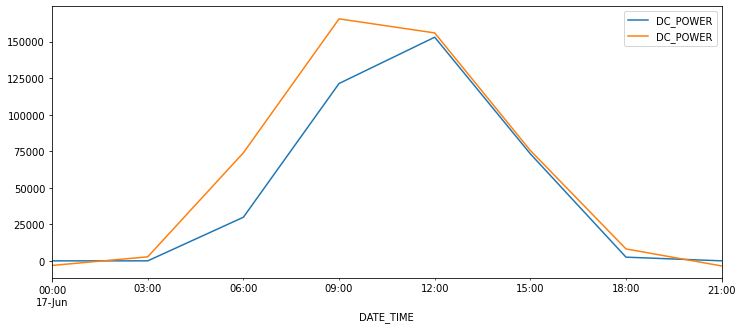

In [3168]:
df['DC_POWER'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast_ar['DC_POWER'].plot(legend=True);

# not terrible, but worse than VAR

##### (Evaluate the model)

In [3165]:
RMSE3 = rmse(df['DC_POWER'][-nobs:], df_forecast_ar['DC_POWER'])

print(f'DC_POWER VAR(7) RMSE: {RMSE2:.3f}')
print(f'DC_POWER  AR(7) RMSE: {RMSE3:.3f}')

DC_POWER VAR(7) RMSE: 18384.070
DC_POWER  AR(7) RMSE: 22308.185


In [3166]:
# VAR fits better plain AR on the dataset

---

##### (Retrain the model on the full data using VAR(7) model, and forecast the next day)

In [3178]:
for i in [1,2,3,4,5,6,7,8,9,10]:
    model = VAR(df_transformed)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  22.005427849702944
BIC:  22.08539278212513

Order = 2
AIC:  21.87409296856983
BIC:  22.007725361863578

Order = 3
AIC:  21.633827613311468
BIC:  21.821416485427708

Order = 4
AIC:  21.379078543212128
BIC:  21.620915531418888

Order = 5
AIC:  21.042632749164504
BIC:  21.33901214312389

Order = 6
AIC:  20.469084125939112
BIC:  20.820302901318893

Order = 7
AIC:  20.063424553662294
BIC:  20.46978240629256

Order = 8
AIC:  20.093072675135602
BIC:  20.55487205572132

Order = 9
AIC:  20.116094428826266
BIC:  20.63364057822673

Order = 10
AIC:  20.144609297134267
BIC:  20.718210282220674



In [3179]:
model = VAR(df_transformed)
for i in [1,2,3,4,5,6,7,8,9,10]:
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  22.005427849702944
BIC:  22.08539278212513

Order = 2
AIC:  21.87409296856983
BIC:  22.007725361863578

Order = 3
AIC:  21.633827613311468
BIC:  21.821416485427708

Order = 4
AIC:  21.379078543212128
BIC:  21.620915531418888

Order = 5
AIC:  21.042632749164504
BIC:  21.33901214312389

Order = 6
AIC:  20.469084125939112
BIC:  20.820302901318893

Order = 7
AIC:  20.063424553662294
BIC:  20.46978240629256

Order = 8
AIC:  20.093072675135602
BIC:  20.55487205572132

Order = 9
AIC:  20.116094428826266
BIC:  20.63364057822673

Order = 10
AIC:  20.144609297134267
BIC:  20.718210282220674



In [3180]:
# The VAR(7) model returns the lowest combined scores

##### (Fit the VAR(7) model)

In [3181]:
results = model.fit(7)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 06, Oct, 2020
Time:                     14:40:28
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    20.4698
Nobs:                     264.000    HQIC:                   20.2267
Log likelihood:          -3367.57    FPE:                5.17060e+08
AIC:                      20.0634    Det(Omega_mle):     4.62957e+08
--------------------------------------------------------------------
Results for equation DC_POWER
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                       -729.447647      1417.357543           -0.515           0.607
L1.DC_POWER                   -0.678328         0.064424          -10.529           0.000
L1.AMBIENT_TEMPERATUR

##### (Predict the next 8 values)

In [3182]:
lag_order = results.k_ar
lag_order

7

In [3183]:
z = results.forecast(y=train.values[-lag_order:], steps=8)
z

array([[ 2.34730105e+03, -7.79790563e-01],
       [ 3.94215626e+03,  7.87593855e-03],
       [ 5.84037496e+04,  1.50118092e+00],
       [ 9.08523188e+04,  3.33481746e+00],
       [-2.46197395e+03,  2.11527702e+00],
       [-7.91122054e+04, -1.32708203e+00],
       [-6.49253131e+04, -2.95817188e+00],
       [-6.79596409e+03, -2.00010163e+00]])

In [3184]:
test

,DC_POWER,AMBIENT_TEMPERATURE
DATE_TIME,,
2020-06-17 00:00:00,0.000000,-0.064054
2020-06-17 03:00:00,0.000000,-1.203490
2020-06-17 06:00:00,29863.871905,0.436218
2020-06-17 09:00:00,91561.493333,2.365983
2020-06-17 12:00:00,31701.686667,2.490223
2020-06-17 15:00:00,-79861.092857,-1.051793
2020-06-17 18:00:00,-70736.966667,-3.085081
2020-06-17 21:00:00,-2528.992381,-0.421186


In [3187]:
idx = pd.date_range('6/18/2020', periods=8, freq = '3H')
df_forecast_var = pd.DataFrame(z, index=idx, columns=['DC_POWER_1d','TEMPERATURE_1d'])
df_forecast_var

,DC_POWER_1d,TEMPERATURE_1d
2020-06-18 00:00:00,2347.301054,-0.779791
2020-06-18 03:00:00,3942.156264,0.007876
2020-06-18 06:00:00,58403.749624,1.501181
2020-06-18 09:00:00,90852.318780,3.334817
2020-06-18 12:00:00,-2461.973946,2.115277
2020-06-18 15:00:00,-79112.205354,-1.327082
2020-06-18 18:00:00,-64925.313062,-2.958172
2020-06-18 21:00:00,-6795.964091,-2.000102


##### (Invert the transformation)

In [3188]:
# build the forecast values from the first difference set
df_forecast_var['DC_POWER_Forecast'] = df['DC_POWER'].iloc[-nobs-1] + df_forecast_var['DC_POWER_1d'].cumsum()

df_forecast_var['TEMPERATURE_Forecast'] = df['AMBIENT_TEMPERATURE'].iloc[-nobs-1] + df_forecast_var['TEMPERATURE_1d'].cumsum()

In [3189]:
df_forecast_var

,DC_POWER_1d,TEMPERATURE_1d,DC_POWER_Forecast,TEMPERATURE_Forecast
2020-06-18 00:00:00,2347.301054,-0.779791,2347.301054,23.356818
2020-06-18 03:00:00,3942.156264,0.007876,6289.457317,23.364694
2020-06-18 06:00:00,58403.749624,1.501181,64693.206941,24.865875
2020-06-18 09:00:00,90852.318780,3.334817,155545.525721,28.200693
2020-06-18 12:00:00,-2461.973946,2.115277,153083.551776,30.315970
2020-06-18 15:00:00,-79112.205354,-1.327082,73971.346422,28.988888
2020-06-18 18:00:00,-64925.313062,-2.958172,9046.033360,26.030716
2020-06-18 21:00:00,-6795.964091,-2.000102,2250.069269,24.030614


##### (Plot)

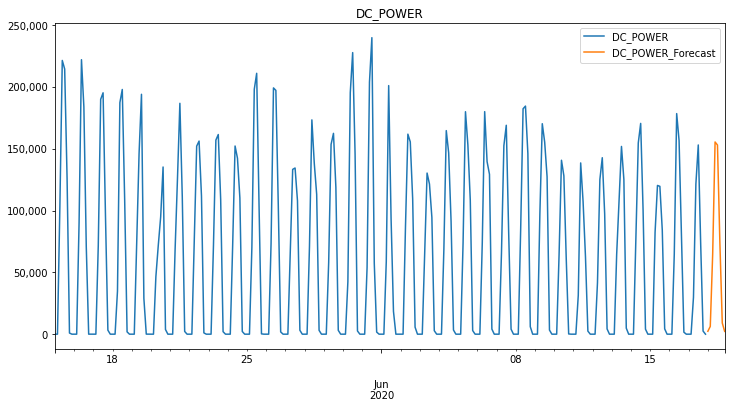

In [3190]:
ax = df['DC_POWER'].plot(legend=True,figsize=(12,6),title=title)
df_forecast_var['D'].plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);